In [25]:
import numpy as np

1.	Create 100 random integers between 1 and 10 (both inclusive). Calculate the frequency of occurrence of the numbers (use bincount()) and plot them as under:<br>
a.	Plot the values on a histogram, with the frequency being displayed above each bar.

In [26]:
narray=np.random.randint(1,11,100)

In [28]:
y=np.bincount(narray)
x=np.arange(0,len(narray))

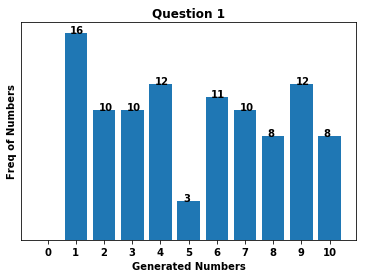

In [29]:
import matplotlib.pyplot as plt
plt.title('Question 1')
plt.xlabel('Generated Numbers')
plt.ylabel('Freq of Numbers')
plt.xticks(np.arange(0,len(y)))
plt.yticks([])
plt.bar(x=np.arange(0,len(y)),height=y)
for x_pos in np.arange(1,len(y)):
    plt.text(x=x_pos-0.2,y=y[x_pos],s=y[x_pos])

b.	Plot the values on a scatter plot, with the numbers below 5 in one color and numbers above five in another color. The markers for the values should appear as stars.

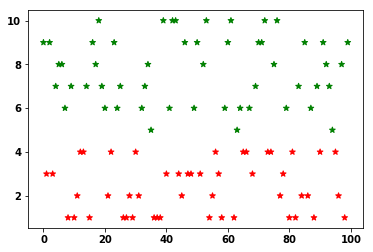

In [30]:
plt.scatter(x=np.arange(0,100),y=narray,c=['red' if i<5 else 'green' for i in narray], marker='*')

2.	Using www.timesjobs.com, perform the following:

a.	Generate the above URL for the default skills – Data Science, Data Analyst, Data Scientist

In [31]:
import urllib
url='https://www.timesjobs.com/candidate/job-search.html?searchType=personalizedSearch&from=submit&'
url_param={'txtKeywords':'Data Science,Data Enigineer','txtLocation':'Pune','cboWorkExp1':8}
print(url + urllib.parse.urlencode(url_param))

https://www.timesjobs.com/candidate/job-search.html?searchType=personalizedSearch&from=submit&txtKeywords=Data+Science%2CData+Enigineer&txtLocation=Pune&cboWorkExp1=8


b.	Accept user input on skill(s), experience and location. The user can input n number of skills.<br>
c.	Build the URL on the basis of the user details collected.

In [33]:
search_param={}
search_param['TxtKeywords']=input('Enter skills (comma separated): ')
search_param['txtLocation']=input('Enter location of job: ')
search_param['cboWorkExp1']=input('Enter year of experience: ')
generated_url=url + urllib.parse.urlencode(search_param)
print(generated_url)

Enter skills (comma separated): Python,Hadoop,hdfs,Unix,Machine learning,Oracle,SQL,Unix,Linux,plsql
Enter location of job: Pune
Enter year of experience: 8
https://www.timesjobs.com/candidate/job-search.html?searchType=personalizedSearch&from=submit&TxtKeywords=Python%2CHadoop%2Chdfs%2CUnix%2CMachine+learning%2COracle%2CSQL%2CUnix%2CLinux%2Cplsql&txtLocation=Pune&cboWorkExp1=8


d.	Extract from the URL, the following skills required for the different jobs on the web page.<br>
e.	Create a hrizontal bar chart of the skills and the number of jobs that require that skill, in descending order. (Ignore skills that have a count of 1 on the web page.)

In [34]:
import requests,bs4,string
fhand=requests.get(generated_url)
company_skills={}
soup=bs4.BeautifulSoup(fhand.text,'html.parser')
ul_tag=soup.find('ul',{'class':'new-joblist'})
for tag in ul_tag.findAll('li',{'class':'clearfix job-bx wht-shd-bx'}):
    company_skills[tag.find('h3',{'class':'joblist-comp-name'}).text.replace('(More Jobs)','').strip()]=[skill.strip() for skill in tag.find('span',{'class':'srp-skills'}).text.split(',')]
# print(len(company_skills.keys()))
noj=int(soup.find('span',{'id':'totolResultCountsId'}).text)/25
nextpageurl='https://www.timesjobs.com/candidate/job-search.html?from=submit&'
np_param={}
np_param['actualTxtKeywords']=search_param['TxtKeywords']
np_param['searchBy']=0
np_param['rdoOperator']='OR'
np_param['searchType']='personalizedSearch'
np_param['txtLocation']=search_param['txtLocation']
np_param['luceneResultSize']=25
np_param['postWeek']=60
np_param['TxtKeywords']=search_param['TxtKeywords']
np_param['cboWorkExp1']=search_param['cboWorkExp1']
np_param['pDate']='I'
np_param['sequence']=2
np_param['startPage']=1
for seq in range(2,int(noj)):
    np_param['sequence']=seq
    next_page=requests.get(nextpageurl + urllib.parse.urlencode(np_param))
#     print(nextpageurl + urllib.parse.urlencode(np_param))
    soup=bs4.BeautifulSoup(next_page.text,'html.parser')
    ul_tag=soup.find('ul',{'class':'new-joblist'})
    for tag in ul_tag.findAll('li',{'class':'clearfix job-bx wht-shd-bx'}):
        company_skills[tag.find('h3',{'class':'joblist-comp-name'}).text.replace('(More Jobs)','').strip()]=[skill.strip() for skill in tag.find('span',{'class':'srp-skills'}).text.split(',')]
# print(company_skills)
skill_count={}
for key in company_skills.keys():
    for skill in company_skills[key]:
        if skill.capitalize() in skill_count.keys():
            skill_count[skill.capitalize()]+=1
        else:
            skill_count[skill.capitalize()]=1

[22, 22, 13, 9, 7, 3]
['Oracle', 'Linux', 'Python', 'Unix', 'Hadoop', 'Machine learning']


<BarContainer object of 6 artists>

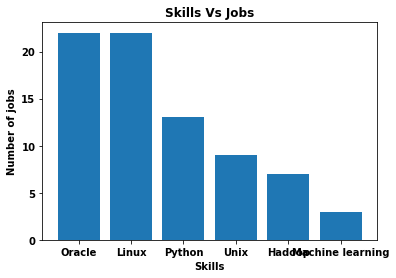

In [35]:
skill_count={}
for key in company_skills.keys():
    for skill in company_skills[key]:
        if skill.capitalize() in skill_count.keys():
            skill_count[skill.capitalize()]+=1
        else:
            skill_count[skill.capitalize()]=1
plt.title('Skills Vs Jobs')
plt.xlabel('Skills')
plt.ylabel('Number of jobs')
required_skills={}
for skill in search_param['TxtKeywords'].split(','):
    if skill in skill_count.keys() and skill_count[skill.capitalize()]>1:
        required_skills[skill.capitalize()]=skill_count[skill.capitalize()]
print(sorted(required_skills.values(),reverse=True))
print(sorted(required_skills,key=required_skills.get,reverse=True))
# plt.xticks(np.arange(0,len(y)))
# plt.yticks([])
# plt.bar(x=[skill.capitalize() for skill in search_param['TxtKeywords'].split(',')  if skill in skill_count.keys() and skill_count[skill.capitalize()]>1],height=[skill_count[skill.capitalize()] for skill in search_param['TxtKeywords'].split(',')  if skill in skill_count.keys() and skill_count[skill.capitalize()]>1])
plt.bar(x=sorted(required_skills,key=required_skills.get,reverse=True),height=sorted(required_skills.values(),reverse=True))
# skill_count.keys()
